# Data Exploration - Phase II
Shpaner, Leonid  
Robinson, Christopher  
Luis-Estrada, Jose  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library

/content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library


In [5]:
####################################
## import the requisite libraries ##
####################################
import os
import csv
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# suppress warnings for cleaner output
warnings.filterwarnings('ignore')
# suppress future warnings for cleaner output
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [6]:
# check current working directory
current_directory = os.getcwd()
current_directory

'/content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library'

### Assign Paths to Folders

In [15]:
# path to the data file
data_path1 = '/content/drive/Shareddrives/Capstone - Best Group/' \
           + 'Final_Data_20220719/df.csv'

# path to data folder
data_path2 = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime/'\
             'Data Folder/'

# path to the training file
data_path3 = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime/'\
             'Data Folder/train_set.csv'

# path to the image library
image_path = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime'\
          + '/Image Folder'        

In [16]:
# bring in original dataframe only for join purposes
df = pd.read_csv(data_path1, low_memory=False).set_index('OBJECTID')

In [20]:
pd.set_option('display.max_rows', None)
df.head().T

OBJECTID,18,36,37,44,56
77th_Street,0,0,0,0,0
Central,0,0,0,0,0
Devonshire,0,0,0,0,0
Foothill,0,0,0,0,0
Harbor,1,0,0,0,0
Hollenbeck,0,0,0,1,0
Hollywood,0,0,0,0,0
Mission,0,0,0,0,0
N_Hollywood,0,0,0,0,0
Newton,0,0,0,0,1


In [26]:
# show the columns of the dataframe for inspection
train_set = pd.read_csv(data_path3).set_index('OBJECTID')
df_eda = train_set.copy()

In [30]:
df_eda = df_eda.join(df['Status_Desc'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Type'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Victim_Sex'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Victim_Desc'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Time_of_Day'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Premises'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['crime_severity'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['Month'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['age_bin'], how='left', lsuffix='left', rsuffix='right')
df_eda = df_eda.join(df['AREA_NAME'], how='left', lsuffix='left', rsuffix='right')
df_eda.head()

,77th_Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N_Hollywood,Newton,...,Status_Desc,Type,Victim_Sex,Victim_Desc,Time_of_Day,Premises,crime_severityright,Month,age_bin,AREA_NAME
OBJECTID,,,,,,,,,,,,,,,,,,,,,
146996,1,0,0,0,0,0,0,0,0,0,...,Invest Cont,Minor,M,Hispanic/Latin/Mexican,Afternoon,Street,Less Serious,1,30-35,77th_Street
12913,0,0,0,0,0,0,0,0,1,0,...,Invest Cont,Primary,F,Hispanic/Latin/Mexican,Evening,Park_Playground,More Serious,2,30-35,N_Hollywood
199420,0,0,0,0,0,0,0,0,0,0,...,Invest Cont,Minor,M,Other,Morning,Street,More Serious,1,NaN,West_Valley
139528,0,0,0,0,0,0,0,0,0,0,...,Invest Cont,Minor,F,Hispanic/Latin/Mexican,Afternoon,Street,Less Serious,2,10-15,Rampart
91647,0,0,0,0,0,0,0,0,0,0,...,Invest Cont,Minor,M,Hispanic/Latin/Mexican,Morning,Street,More Serious,5,35-40,Rampart


In [32]:
# re-inspect the shape of the dataframe. This is also done on EDA file.
df_eda.shape

(21036, 62)

## Bar Plot of Age Range

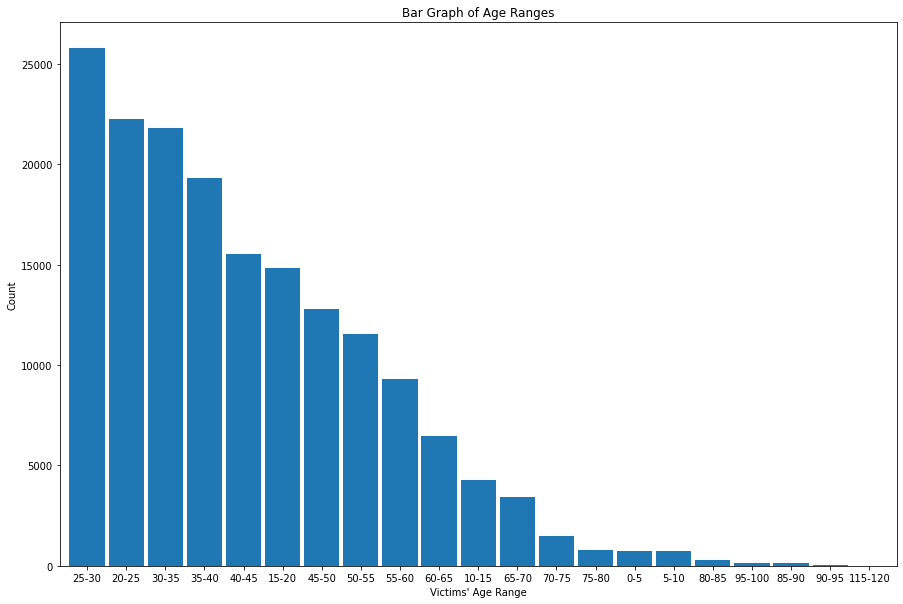

In [33]:
# this bar_plot library was created as a bar_plot.py file during the EDA Phase I
# stage; it can be acccessed in that respective notebook
from functions import bar_plot
bar_plot(15, 10, df, False, 'bar', 'Bar Graph of Age Ranges', 0, 
         "Victims' Age Range", 'Count', 'age_bin', 100)
plt.savefig(image_path + '/age_range_bargraph.png', bbox_inches = 'tight')

## Contingency Table

In [35]:
def cont_table(df, col1, lev1, col2, lev2, new):
  crime_less = df.loc[df[col1]==lev1].groupby([col2])[[col1]].count()
  crime_less.rename(columns = {col1:lev1}, inplace=True)
  crime_more = df.loc[df[col1]==lev2].groupby([col2])[[col1]].count()
  crime_more.rename(columns={col1:lev2}, inplace=True)
  crime_res_comb = pd.concat([crime_less, crime_more], axis=1)

  # sum row totals
  crime_res_comb['Total']=crime_res_comb.sum(axis=1)
  crime_res_comb.loc['Total']=crime_res_comb.sum(numeric_only=True, axis=0)
  # get % total of each row
  crime_res_comb['% More Serious']=round((crime_res_comb[lev2] / 
  (crime_res_comb[lev2]+crime_res_comb[lev1]))*100, 2)
  crime_res_comb[lev2]=crime_res_comb[lev2].fillna(0)
  crime_res_comb['% More Serious']=crime_res_comb['% More Serious'].fillna(0)
  df.rename_axis(new)
  # crime_res_comb.set_index('new_index_name')
  
  return crime_res_comb.style.format("{:,.0f}")

### Contingency Table - Crime Severity by Age Groups

In [37]:
age_table = cont_table(df, 'crime_severity', 'Less Serious', 'age_bin', 
                       'More Serious', 'N').data
age_table

,Less Serious,More Serious,Total,% More Serious
age_bin,,,,
0-5,248.0,495.0,743.0,66.62
10-15,2329.0,1932.0,4261.0,45.34
15-20,6348.0,8465.0,14813.0,57.15
20-25,9697.0,12538.0,22235.0,56.39
25-30,10975.0,14817.0,25792.0,57.45
30-35,9708.0,12093.0,21801.0,55.47
35-40,8583.0,10716.0,19299.0,55.53
40-45,6744.0,8802.0,15546.0,56.62
45-50,5802.0,6975.0,12777.0,54.59


## Summary Statistics

In [39]:
def summ_stats(df, var1, var2):
    print("\033[1m"+'Summary Statistics by Age'+"\033[1m")
    pd.options.display.float_format = '{:,.2f}'.format
    summ_stats = df.groupby(var1)[var2].agg(['mean', 'median', 'std', 'min', 'max'])
    summ_stats.loc['Total'] = summ_stats.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = summ_stats.rename(columns = column_rename)
    return dfsummary

### Status Description by Age

In [40]:
summ_stats(df, 'Status_Desc', 'Vict_Age')

Summary Statistics by Age


,Mean,Median,Standard Deviation,Minimum,Maximum
Status_Desc,,,,,
Adult Arrest,33.00,32.00,17.85,0.00,99.00
Adult Other,35.69,34.00,15.24,0.00,99.00
Invest Cont,34.64,33.00,16.96,0.00,120.00
Juv Arrest,26.26,23.00,16.39,0.00,81.00
Juv Other,23.35,17.00,16.01,0.00,76.00
Total,152.95,139.00,82.44,0.00,475.00


### Victim Sex by Age

In [41]:
summ_stats(df, 'Victim_Sex', 'Vict_Age')

Summary Statistics by Age


,Mean,Median,Standard Deviation,Minimum,Maximum
Victim_Sex,,,,,
F,34.44,32.00,15.19,0.00,99.00
M,36.32,35.00,16.46,0.00,99.00
X,5.69,0.00,12.95,0.00,120.00
Total,76.46,67.00,44.60,0.00,318.00


## Stacked Bar Plots

In [42]:
def stacked_plot (x, y, p, df, col, truth, condition, kind, title1, xlabel1, 
                  ylabel1, width, rot, title2, xlabel2, ylabel2):
  fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(x, y))
  flat = axes.flatten()
  fig.tight_layout(w_pad=5, pad=p, h_pad=5)
  flat = axes.flatten()
  fig.suptitle('Absolute Distributions vs. Normalized Distributions')

  crosstabdest = pd.crosstab(df[col], df[truth])\
                .sort_values(by=[condition], ascending=False)
  crosstabdestnorm = crosstabdest.div(crosstabdest.sum(1), axis = 0)

  plotdest = crosstabdest.plot(kind=kind, stacked=True, title=title1, 
                               ax=flat[0], 
                               color=['#00BFC4', '#F8766D'], width=width, 
                               rot=rot)
  flat[0].set_xlabel(xlabel1)
  flat[0].set_ylabel(ylabel1)
  plotdestnorm = crosstabdestnorm.plot(kind=kind, stacked=True, title=title2,
                                       ylabel='Frequency', 
                                       ax=flat[1], color=['#00BFC4', '#F8766D'], 
                                       width=width, rot=rot)
  flat[1].set_xlabel(xlabel2)
  flat[1].set_ylabel(ylabel2)
  plt.xlabel(xlabel2)

### Crime Severity by Age Group

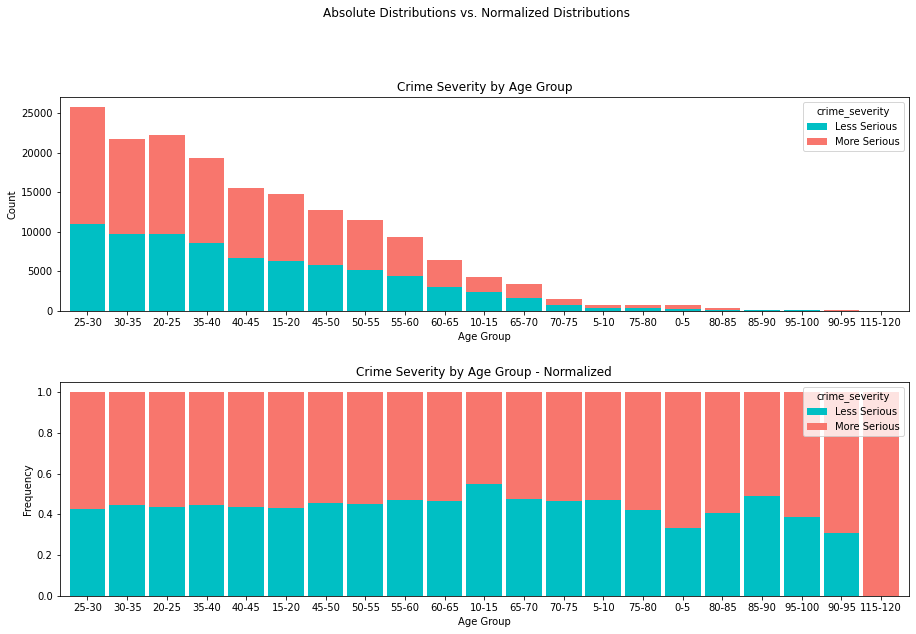

In [44]:
stacked_plot(15, 10, 10, df, 'age_bin', 'crime_severity', 'Less Serious', 'bar', 
             'Crime Severity by Age Group', 'Age Group', 'Count', 0.9, 0,
             'Crime Severity by Age Group - Normalized', 'Age Group', 'Frequency')
plt.savefig(image_path + '/age_crime_bargraph.png', bbox_inches = 'tight')

### Status Description by Crime Severity

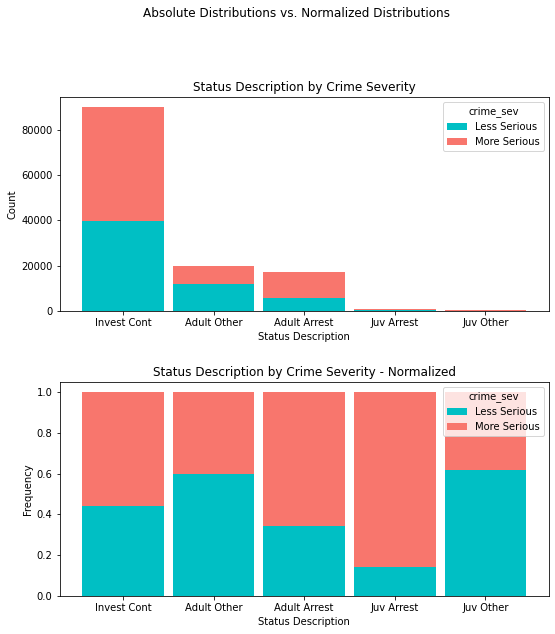

In [ ]:
stacked_plot(10, 10, 10, df, 'Status_Desc', 'crime_severity', 'Less Serious', 
             'bar', 'Status Description by Crime Severity', 'Status Description', 
             'Count', 0.9, 0, 'Status Description by Crime Severity - Normalized', 
             'Status Description', 'Frequency')
plt.savefig(image_path + '/status_desc_bargraph.png', bbox_inches = 'tight')

### Crime Severity by Street Type

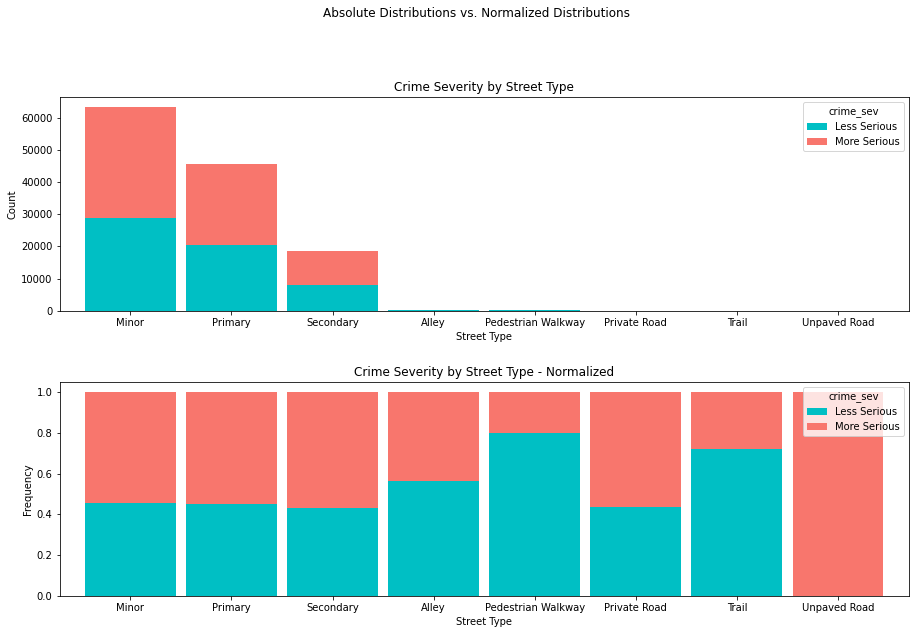

In [ ]:
stacked_plot(15, 10, 10, df, 'Type', 'crime_severity', 'Less Serious', 'bar', 
             'Crime Severity by Street Type', 'Street Type', 'Count', 0.9, 0, 
             'Crime Severity by Street Type - Normalized', 'Street Type',
             'Frequency')
plt.savefig(image_path + '/street_type_bargraph.png', bbox_inches = 'tight')

### Victim's Sex by Crime Severity

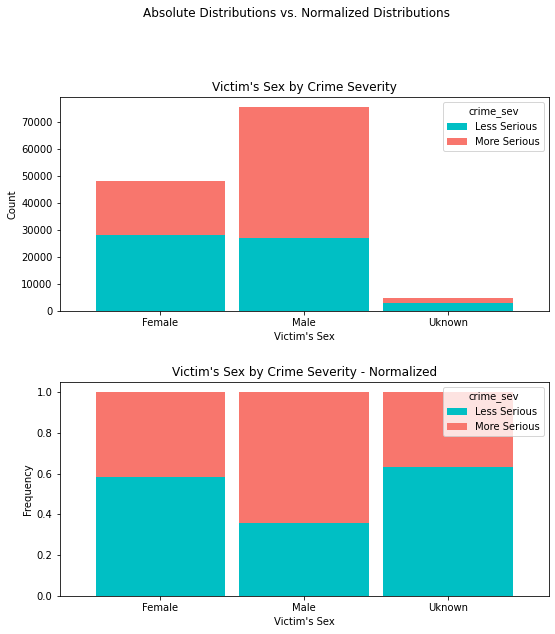

In [ ]:
stacked_plot(10, 10, 10, df, 'Victim_Sex', 'crime_severity', 'Less Serious', 'bar', 
             "Victim's Sex by Crime Severity", "Victim's Sex", 'Count', 0.9, 0, 
             "Victim's Sex by Crime Severity - Normalized", "Victim's Sex",
             'Frequency')
plt.savefig(image_path + '/victim_sex_bargraph.png', bbox_inches = 'tight')

## Victim Descent by Crime Severity

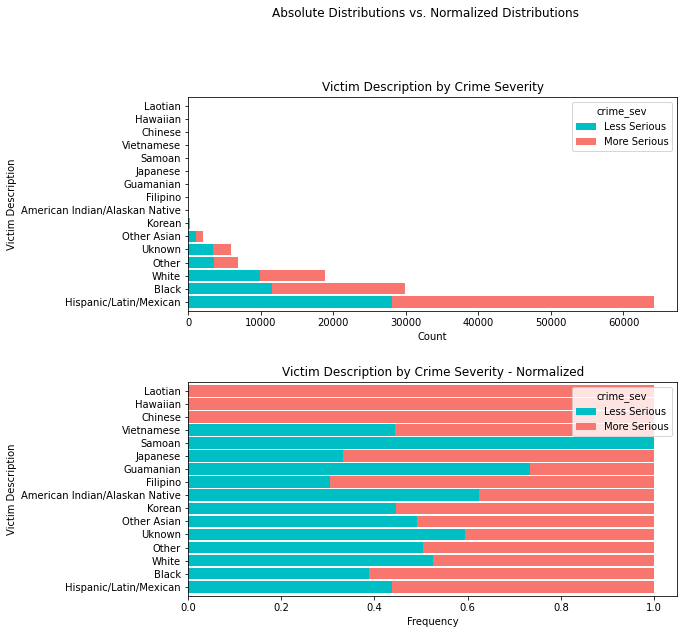

In [ ]:
stacked_plot(10,10, 10, df, 'Victim_Desc', 'crime_severity', 'Less Serious', 'barh', 
            'Victim Description by Crime Severity', 'Count', 'Victim Description', 
             0.9, 0, 'Victim Description by Crime Severity - Normalized', 
             'Frequency', 'Victim Description')
plt.savefig(image_path + '/victim_desc_bargraph.png', bbox_inches = 'tight')

## Examining Possible Correlations

In [45]:
train_set = pd.read_csv(data_path3)

In [49]:
def corr_plot(df, x, y):
  # correlation matrix title
  print("\033[1m"+'La Crime Data: Correlation Matrix'+"\033[1m")
  # assign correlation function to new variable
  corr = df.corr()
  matrix = np.triu(corr) # for triangular matrix
  plt.figure(figsize=(x,y))
  # parse corr variable intro triangular matrix
  sns.heatmap(df.corr(method='pearson'), 
              annot=True, linewidths=.5, cmap='coolwarm', mask=matrix,
              square = True, 
              cbar_kws={'label': 'Correlation Index'})
  plt.show()

In [64]:
train_set['Tunnel'].value_counts()

0    21036
Name: Tunnel, dtype: int64

In [61]:
corr_df = train_set.reset_index(drop=True)
corr_df = corr_df.drop(columns='OBJECTID')

La Crime Data: Correlation Matrix


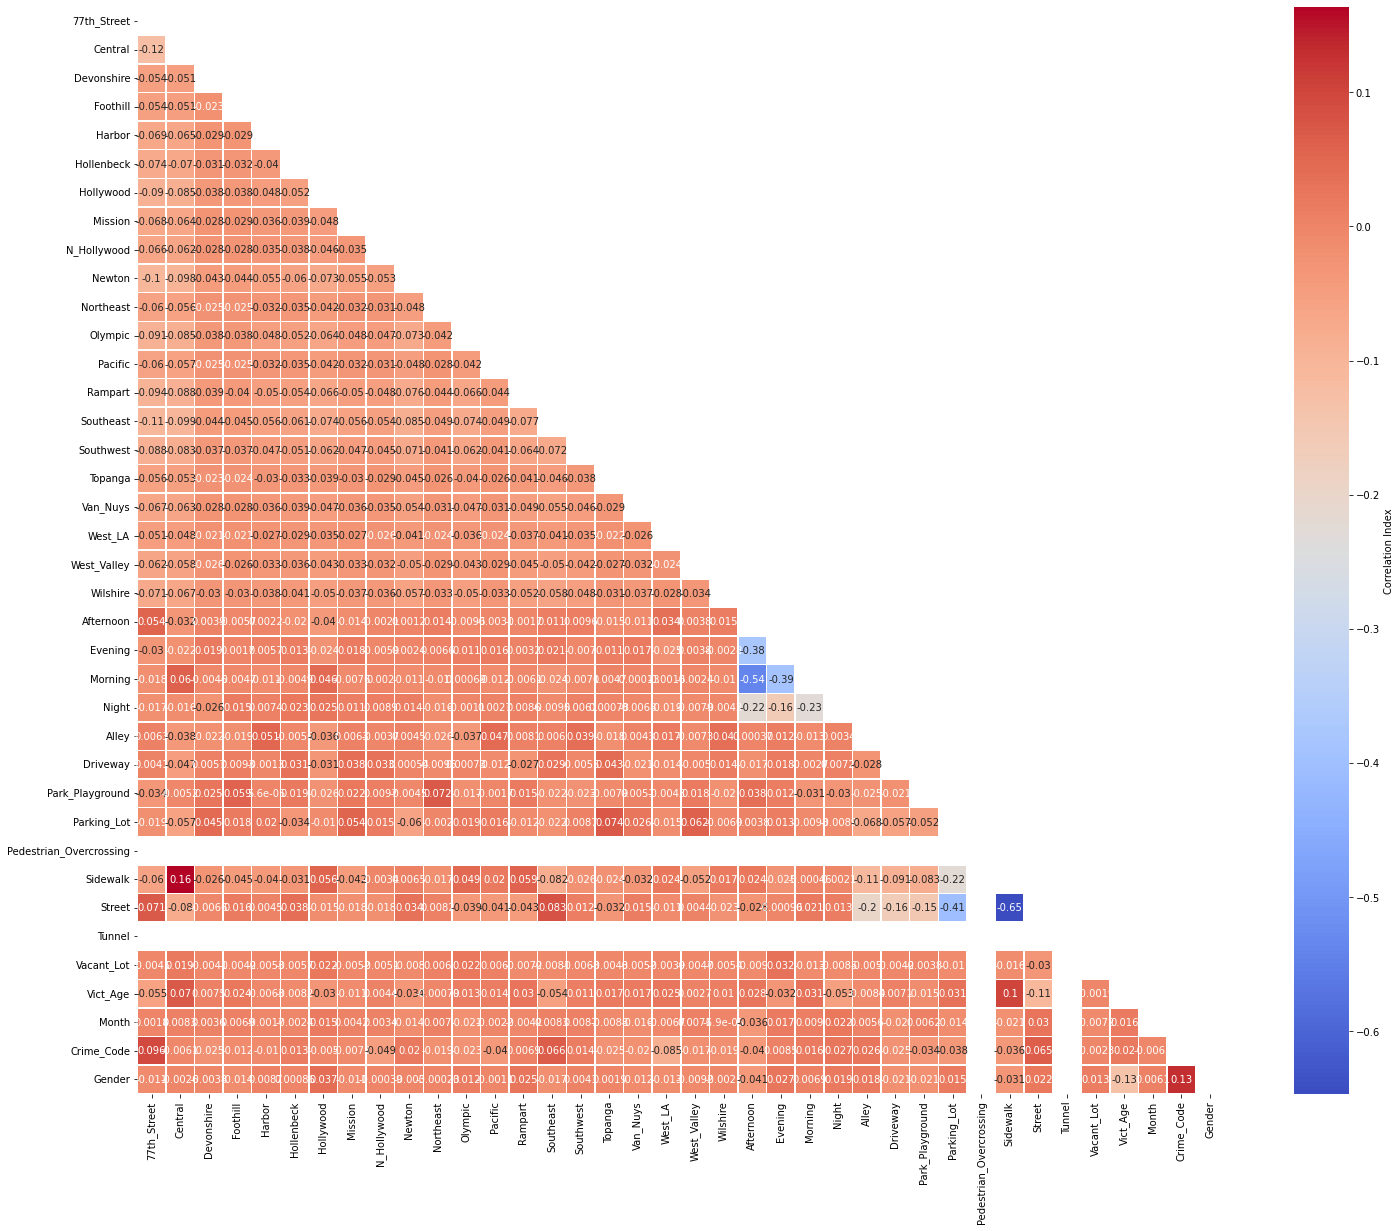

In [62]:
corr_plot(corr_df, 25, 20)